In [7]:
import nltk
from nltk.corpus import stopwords
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dayas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dayas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import pandas as pd
df = pd.read_csv('Final_Yelp_Dataset.csv')

In [10]:
print("Total No. of Reviews: {}".format(df.shape[0]))

Total No. of Reviews: 19896


In [11]:
reviews_dataset.columns


Index(['Company name', 'Location', 'Rating', 'Review Text'], dtype='object')

In [12]:
reviews_dataset["Rating"].value_counts()

Rating
5    10883
4     4447
3     2069
2     1280
1     1217
Name: count, dtype: int64

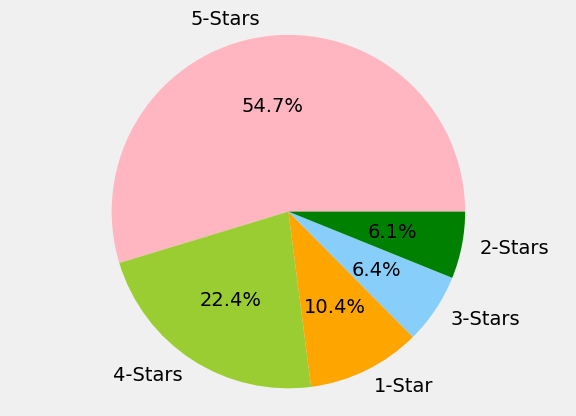

In [13]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["Rating"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [36]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in word_tokenize(text) if not word in stopwords.words('english')])  # Remove stopwords and tokenize
    return text

In [22]:
texts = []
stars = [df['Rating'] for review in reviews_dataset]
pbar = tqdm(total=df.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(clean_text(row['Review Text']))
    pbar.update(1)
pbar.close()

  0%|          | 0/19897 [00:00<?, ?it/s]

In [28]:
df['Sentiment'] = df['Rating'].apply(lambda x: 'Negative' if x < 3 else ('Neutral' if x == 3 else 'Positive'))

In [29]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=3000)  # You can adjust max_features

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'],df['Sentiment'],test_size=0.25, random_state=42)

In [33]:
from sklearn.pipeline import Pipeline


In [38]:
# Pipeline creation
svm_pipeline = make_pipeline(vectorizer, SVC(kernel='linear'))
# Model training
svm_pipeline.fit(X_train, y_train)

# Prediction and evaluation
predictions = svm_pipeline.predict(X_test)

In [39]:
print('Classification Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.68      0.72       637
     Neutral       0.52      0.28      0.36       509
    Positive       0.91      0.98      0.94      3828

    accuracy                           0.87      4974
   macro avg       0.73      0.65      0.67      4974
weighted avg       0.85      0.87      0.85      4974

Confusion Matrix:
 [[ 433   84  120]
 [ 102  141  266]
 [  35   48 3745]]


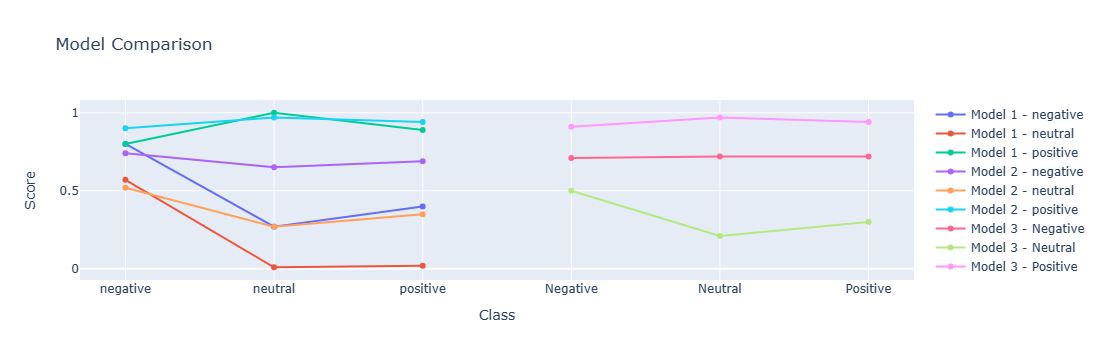

In [3]:
import plotly.graph_objs as go

# Precision, recall, and F1-score for each class for three models
models_data = {
    "Model 1": {
        "classes": ["negative", "neutral", "positive"],
        "precision": [0.80, 0.57, 0.80],
        "recall": [0.27, 0.01, 1.00],
        "f1_score": [0.40, 0.02, 0.89]
    },
    "Model 2": {
        "classes": ["negative", "neutral", "positive"],
        "precision": [0.74, 0.52, 0.90],
        "recall": [0.65, 0.27, 0.97],
        "f1_score": [0.69, 0.35, 0.94]
    },
    "Model 3": {
        "classes": ["Negative", "Neutral", "Positive"],
        "precision": [0.71, 0.50, 0.91],
        "recall": [0.72, 0.21, 0.97],
        "f1_score": [0.72, 0.30, 0.94]
    }
}

# Create traces for each class and model
traces = []
for model, data in models_data.items():
    for i in range(len(data['classes'])):
        traces.append(go.Scatter(
            x=data['classes'],
            y=[data['precision'][i], data['recall'][i], data['f1_score'][i]],
            mode='lines+markers',
            name=model + ' - ' + data['classes'][i]
        ))

# Layout
layout = go.Layout(
    title='Model Comparison',
    xaxis=dict(title='Class'),
    yaxis=dict(title='Score'),
)

# Plot
fig = go.Figure(data=traces, layout=layout)
fig.show()


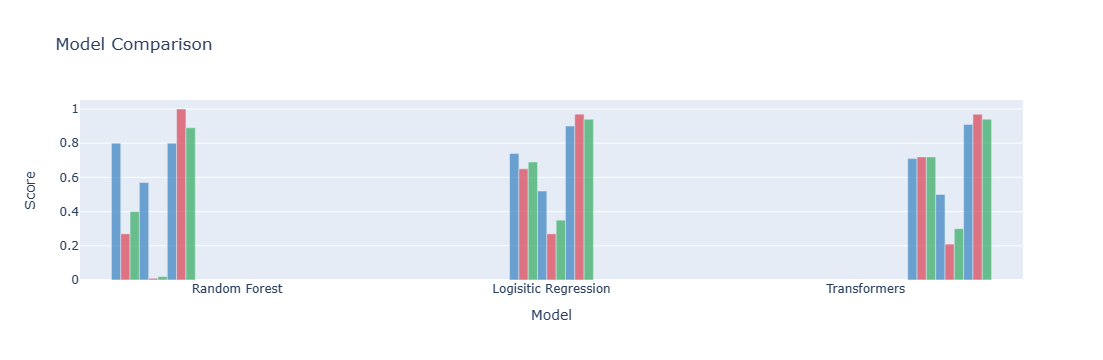

In [6]:
import plotly.graph_objs as go

# Precision, recall, and F1-score for each class for three models
models_data = {
    "Random Forest": {
        "classes": ["negative", "neutral", "positive"],
        "precision": [0.80, 0.57, 0.80],
        "recall": [0.27, 0.01, 1.00],
        "f1_score": [0.40, 0.02, 0.89]
    },
    "Logisitic Regression": {
        "classes": ["negative", "neutral", "positive"],
        "precision": [0.74, 0.52, 0.90],
        "recall": [0.65, 0.27, 0.97],
        "f1_score": [0.69, 0.35, 0.94]
    },
    "Transformers": {
        "classes": ["Negative", "Neutral", "Positive"],
        "precision": [0.71, 0.50, 0.91],
        "recall": [0.72, 0.21, 0.97],
        "f1_score": [0.72, 0.30, 0.94]
    }
}

# Create traces for each class and metric
traces = []
for model, data in models_data.items():
    for i, cls in enumerate(data['classes']):
        traces.append(go.Bar(
            x=[model],
            y=[data['precision'][i]],
            name=cls + ' Precision',
            marker=dict(color='rgba(55, 128, 191, 0.7)'),
            legendgroup=cls,
            showlegend=True if model == "Model 1" else False
        ))
        traces.append(go.Bar(
            x=[model],
            y=[data['recall'][i]],
            name=cls + ' Recall',
            marker=dict(color='rgba(219, 64, 82, 0.7)'),
            legendgroup=cls,
            showlegend=False
        ))
        traces.append(go.Bar(
            x=[model],
            y=[data['f1_score'][i]],
            name=cls + ' F1-score',
            marker=dict(color='rgba(50, 171, 96, 0.7)'),
            legendgroup=cls,
            showlegend=False
        ))

# Layout
layout = go.Layout(
    barmode='group',
    title='Model Comparison',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Score'),
    legend=dict(orientation="h", x=0.1, y=-0.2)
)

# Plot
fig = go.Figure(data=traces, layout=layout)
fig.show()
